# Receptor Modeling

Quantitative pharmacologists construct Markov chain models to give insight into the relationship between ligand concentration and the fraction of cell surface receptors in each of several molecular conformations. Pharmacologists use these stochastic models to understand the action of natural ligands and drugs on receptor-mediated cell responses. When receptors function as two or more similar protein subunits working in concert (i.e., homodimers or oligomers), receptor models must

1. account for symmetry,
2. satisfy thermodynamic constraints, and
3. properly account for subunit interactions (allostery) mediated by conformational coupling.

The modeling framework that satisfies these three requirements will be explicated in the context of models of G protein-coupled receptors (GPCRs), such as metabotropic glutamate receptors, that function as multi-molecule signaling complexes.  For equilibrium models of receptor dimers, this approach facilitates the inference of a parsimonious subset of allosteric interactions leading to conformational coupling and dependence of receptor subunits.

(receptors:three_state_model)=
## Three-state receptor model

As a simple example, consider a three-state receptor model.  When both forward and reverse transitions are explicit, the state-transition diagram has the topology of a symmetric directed version of the [path graph $P_3$](example_graphs:path_graph) with 3 vertices. 

Here is the (undirected) path graph $P_3$:

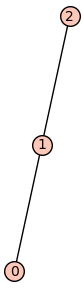

In [1]:
G = Graph({0: [1], 1: [2]})
G.plot(figsize=4)

The symmetric directed version is

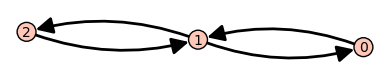

In [2]:
G = DiGraph({0: [1], 1: [0,2], 2: [1]})
G.plot(figsize=4)

Was the above code hidden???

Our practice will be to define symbolic variables and put these on the vertices and edges.

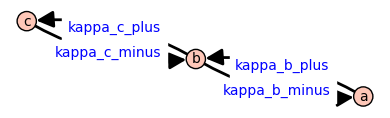

In [3]:
var('a b c kappa_b_plus kappa_b_minus kappa_c_plus kappa_c_minus')
G = DiGraph([[a,b,c],[(a,b),(b,a),(b,c),(c,b)]])
G.set_edge_label(a,b,kappa_b_plus)
G.set_edge_label(b,a,kappa_b_minus)
G.set_edge_label(b,c,kappa_c_plus)
G.set_edge_label(c,b,kappa_c_minus)
G.plot(figsize=4,edge_labels=True)

In the state-transition diagram shown above,   $\kappa_b$ and $\kappa_c$ are dimensionless equilibrium constants,
$\kappa_b^*$ and $\kappa_c^*$ are association constants, and $x$ is ligand concentration.  The solid harpoons indicate the forward reaction direction.  For example, the reaction labelled $\kappa_b$ has $a$ as reactant and $b$ as product; consequently, increasing $\kappa_b$ decreases the equilibrium probability (relative fraction) of state $a$ and increases the probability of state $b$.  
The three states of Equation XXX are labelled so that the reactant comes before the product in dictionary order ($a$ to $b$ to $c$).  The subscript of the equilibrium constants $\kappa_b$ and $\kappa_c$ are chosen to match the label of the reaction products.

$\def\b{\mathsf{b}}$
$\def\c{\mathsf{c}}$
$\def\kappab{\kappa_{\b}}$
$\def\kappac{\kappa_{\c}}$
$\def\kappabstar{\hat{\kappa}_{\b}}$
$\def\kappacstar{\hat{\kappa}_{\c}}$

For an isolated monomer with a state\-transition diagram given by Equation XXX, the probability of state $i$ is given by
$\pi_i = z_i / z_T$ where  $z_T= \textstyle \sum_i z_i$,
$z_a = 1$,
$z_b = \kappab = \kappabstar x$, and
$z_c =\kappab \kappac = \kappabstar \kappacstar x^2$. That is,

\begin{equation}
\pi_a =  \frac{1}{1+ \kappabstar x  +  \kappabstar \kappacstar x^2} \, ,  \quad \pi_b =  \frac{\kappabstar x}{1+ \kappabstar x +  \kappabstar  \kappacstar x^2}   \quad \mbox{and}  \quad 
\pi_c = \frac{\kappabstar  \kappacstar x^2 }{1+ \kappabstar x +  \kappabstar \kappacstar x^2 }  \, .
\end{equation}

It is helpful to  present this set of rational functions using the following compact notation:
\begin{equation}
 [ \pi_a  :  \pi_b :  \pi_c ] = [1 :\kappab : \kappab \kappac ]  = [1 : \kappabstar x :\kappabstar \kappacstar x^2  ] \,  .
\end{equation}
In expressions of this kind,  it is understood that
$[ x_1 \! : \! x_2 : \! \cdots \! : \! x_n ] = [ \lambda x_1 \! : \! \lambda  x_2 : \! \cdots \! : \! \lambda  x_n ]$ for any $\lambda \neq 0$. Furthermore, $\lambda = 1/\sum_i x_n$ gives the probability distribution $\pi = (\pi_1, \pi_2, \ldots, \pi_n)$ where $1=\sum_i \pi_i$.

One reason for using symbolic variables is that we can produce symbolic expressions important quantities using [module for graphs and digraphs](https://doc.sagemath.org/html/en/reference/graphs/index.html) available in `Sagemath`. For example, the weighted adjacency matrix associated with graph $G$ above is

In [4]:
A = G.weighted_adjacency_matrix()
print(A)

[            0  kappa_b_plus             0]
[kappa_b_minus             0  kappa_c_plus]
[            0 kappa_c_minus             0]


If we are interested in the equilibrium probability of each state of the receptor model, it is sufficient to consider the rooted spanning tree

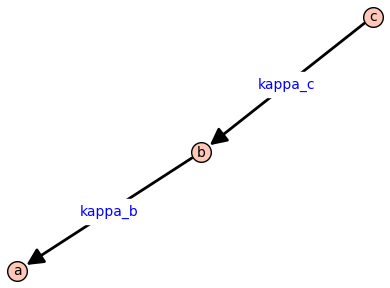

In [5]:
var('a b c kappa_b kappa_c')
T = DiGraph([[a,b,c],[(b,a),(c,b)]])
T.set_edge_label(b,a,kappa_b)
T.set_edge_label(c,b,kappa_c)
T.plot(figsize=4,edge_labels=True)

In [6]:
B = T.weighted_adjacency_matrix()
print(B)
print(B**2)
print(B**3)

[      0       0       0]
[kappa_b       0       0]
[      0 kappa_c       0]
[              0               0               0]
[              0               0               0]
[kappa_b*kappa_c               0               0]
[0 0 0]
[0 0 0]
[0 0 0]


In [7]:
print(B)
print(B**2)
print(B**3)

[      0       0       0]
[kappa_b       0       0]
[      0 kappa_c       0]
[              0               0               0]
[              0               0               0]
[kappa_b*kappa_c               0               0]
[0 0 0]
[0 0 0]
[0 0 0]


### Scraps

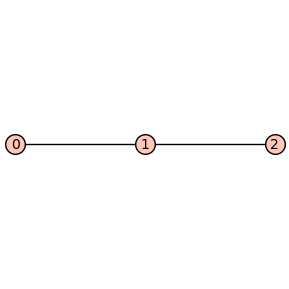

In [8]:
G=graphs.PathGraph(3)
G.show(figsize=4)

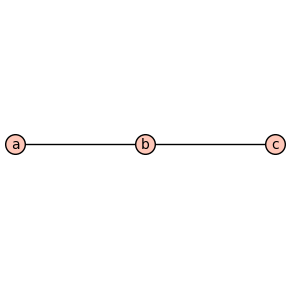

In [9]:
G.relabel(dict({0: 'a', 1: 'b', 2: 'c'}))
G.show(figsize=4)

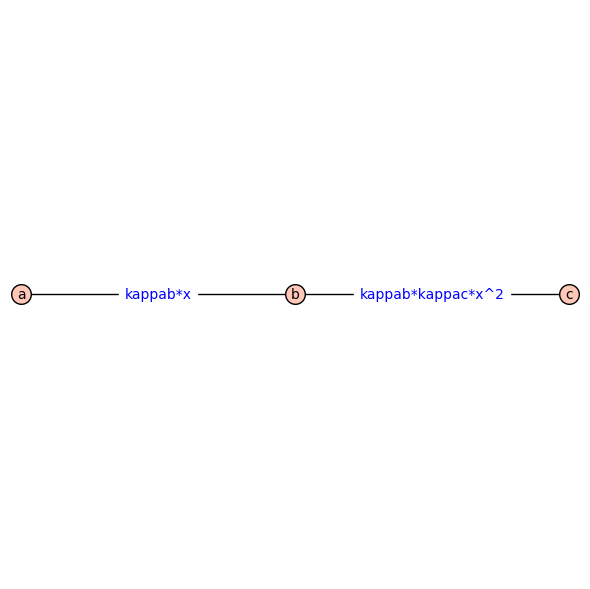

kappab*kappac*x^2

kappab*kappac*x^2

kappab*kappac*x^2


In [10]:
kappab = var("kappab", latex_name=r"\kappa_b")
kappac = var("kappac", latex_name=r"\kappa_c")
x = var("x", latex_name=r"x")
G.set_edge_label('a','b',kappab*x)
G.set_edge_label('b','c',kappab*kappac*x^2)
G.show(edge_labels=True,figsize=8)
f=kappab*kappac*x^2
f.show()
show(f)
print(f)

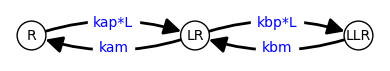

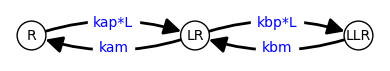

In [11]:
G=graphs.PathGraph(3).to_directed()
G.relabel({0:'R',1:'LR',2:'LLR'})
G.set_edge_label('R','LR','kap*L')
G.set_edge_label('LR','R','kam')
G.set_edge_label('LR','LLR','kbp*L')
G.set_edge_label('LLR','LR','kbm')
G.show(edge_labels=True,figsize=4,talk=True)
G.plot(edge_labels=True,figsize=4,talk=True)

## Basics 

This section presumes an understanding of receptor modeling and mathematical concepts familiar to the mainstream pharmacological community; see Kenakin \(2018\) for an overview. Section 2 reviews this methodology and introduces helpful notation that was developed as part of this work. En passant, we distinguish two ways that thermodynamic constraints and allosteric parameters arise in receptor models: \(1\) when the state\-transition graph of a receptor includes cycles and \(2\) as a property of receptor oligomers that emerges via conformational coupling of constituent monomers.